In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [109]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


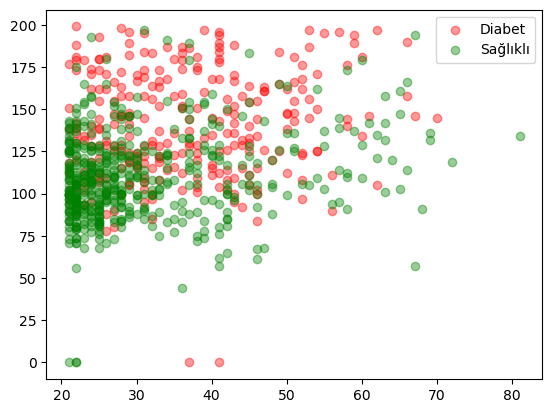

In [110]:
seker_hastalari = df[df.Outcome == 1]
saglikli_insanlar = df[df.Outcome == 0]

plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose , color = "red", label = "Diabet", alpha = 0.4)
plt.scatter(saglikli_insanlar.Age , saglikli_insanlar.Glucose , color = "green" , label = "Sağlıklı", alpha = 0.4)
plt.legend()

In [111]:
x = df.drop(["Outcome"],axis = 1)
y = df.Outcome.values

**Normalize Ediyoruz**

In [112]:
X = (x - np.min(x)) / (np.max(x)- np.min(x)) # Hepsi 0-1 arasındaki sayılara dönüştü

In [113]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007
...,...,...,...,...,...,...,...,...
763,0.011820,0.119385,0.089835,0.056738,0.212766,0.038889,0.000202,0.074468
764,0.002364,0.144208,0.082742,0.031915,0.000000,0.043499,0.000402,0.031915
765,0.005910,0.143026,0.085106,0.027187,0.132388,0.030969,0.000290,0.035461
766,0.001182,0.148936,0.070922,0.000000,0.000000,0.035579,0.000413,0.055556


In [114]:
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 0)

In [115]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
prediction = knn.predict(x_test)
print("K=3 için testlerimizin doğruluğu : ", knn.score(x_test,y_test) )

K=3 için testlerimizin doğruluğu :  0.7142857142857143


**En iyi k değerini bulma**

In [117]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, " ", "Doğruluk oranı % ", knn_yeni.score(x_test,y_test)*100)
    sayac += 1

1   Doğruluk oranı %  59.74025974025974
2   Doğruluk oranı %  71.42857142857143
3   Doğruluk oranı %  71.42857142857143
4   Doğruluk oranı %  77.92207792207793
5   Doğruluk oranı %  75.32467532467533
6   Doğruluk oranı %  77.92207792207793
7   Doğruluk oranı %  75.32467532467533
8   Doğruluk oranı %  77.92207792207793
9   Doğruluk oranı %  77.92207792207793
10   Doğruluk oranı %  80.51948051948052


**İki yeni hastanın diabet tahminini yapalım**

In [118]:
nparray =np.array([[2,87,58,26,16,28.4,0.766,22],
       [0,122,72,1,1,36.3,0.258,52]])# İki hastanın sırasıyla verileri

In [121]:
x_yeni_kisi = pd.DataFrame(nparray, columns = x.columns)
x_yeni_kisi_normalize = ((x_yeni_kisi - np.min(x))/( np.max(x) - np.min(x)))
x_yeni_kisi_normalize

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.002364,0.102837,0.068558,0.030733,0.018913,0.033570,0.000905,0.026005
1,0.000000,0.144208,0.085106,0.001182,0.001182,0.042908,0.000305,0.061466


In [123]:
knn.predict(x_yeni_kisi_normalize)

array([0, 1], dtype=int64)